## Load Library and Dataset

In [3]:
# Import Packages/Library yang Digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline

In [4]:
# Import Dataset yang Digunakan

df = pd.read_csv('data_TA.csv')

## Pre-Processing Step

In [5]:
# Memuat tabel yang dibutuhkan

df.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [6]:
# Menghapus kolom yang tidak digunakan

df.drop('Sl. No.', axis=1, inplace=True)

In [7]:
# Memuat tabel yang dibutuhkan

df.head()

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [8]:
# Menilai kualitas dari seluruh data yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NT        437 non-null    int64  
 1   THT       437 non-null    int64  
 2   THt       437 non-null    int64  
 3   THQCr     437 non-null    int64  
 4   CT        437 non-null    int64  
 5   Ct        437 non-null    float64
 6   DT        437 non-null    float64
 7   Dt        437 non-null    float64
 8   QmT       437 non-null    int64  
 9   TT        437 non-null    int64  
 10  Tt        437 non-null    int64  
 11  TCr       437 non-null    float64
 12  C         437 non-null    float64
 13  Si        437 non-null    float64
 14  Mn        437 non-null    float64
 15  P         437 non-null    float64
 16  S         437 non-null    float64
 17  Ni        437 non-null    float64
 18  Cr        437 non-null    float64
 19  Cu        437 non-null    float64
 20  Mo        437 non-null    float6

In [9]:
df.isna().sum()

NT          0
THT         0
THt         0
THQCr       0
CT          0
Ct          0
DT          0
Dt          0
QmT         0
TT          0
Tt          0
TCr         0
C           0
Si          0
Mn          0
P           0
S           0
Ni          0
Cr          0
Cu          0
Mo          0
RedRatio    0
dA          0
dB          0
dC          0
Fatigue     0
dtype: int64

Terlihat tidak ada *missing value* pada kolom data tersebut.

In [10]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


Dari kode di atas, dapat disimpulkan bahwa tidak ada data yang terduplikat.

In [11]:
df.describe()

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,872.299771,737.643021,25.949657,10.654462,128.855835,40.502059,123.699844,4.843936,35.491991,536.842105,...,0.014611,0.517048,0.570458,0.067780,0.069794,923.629291,0.047181,0.003391,0.007712,552.903890
std,26.212073,280.036541,10.263824,7.841437,281.743539,126.924697,267.128933,15.700076,19.419277,164.101963,...,0.006145,0.852976,0.411769,0.049161,0.088124,576.617020,0.031093,0.008240,0.010418,186.630528
min,825.000000,30.000000,0.000000,0.000000,30.000000,0.000000,30.000000,0.000000,30.000000,30.000000,...,0.003000,0.010000,0.010000,0.010000,0.000000,240.000000,0.000000,0.000000,0.000000,225.000000
25%,865.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,550.000000,...,0.010000,0.020000,0.120000,0.020000,0.000000,590.000000,0.020000,0.000000,0.000000,448.000000
50%,870.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,600.000000,...,0.015000,0.060000,0.710000,0.060000,0.000000,740.000000,0.040000,0.000000,0.000000,505.000000
75%,870.000000,855.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,650.000000,...,0.019000,0.460000,0.980000,0.100000,0.170000,1228.000000,0.070000,0.000000,0.010000,578.000000
max,930.000000,865.000000,30.000000,24.000000,930.000000,540.000000,903.333000,70.200000,140.000000,680.000000,...,0.030000,2.780000,1.170000,0.260000,0.240000,5530.000000,0.130000,0.050000,0.058000,1190.000000


Untuk mendapatkan gambaran umum tentang data, kami memplot histogram semua fitur yang ditunjukkan di bawah ini.

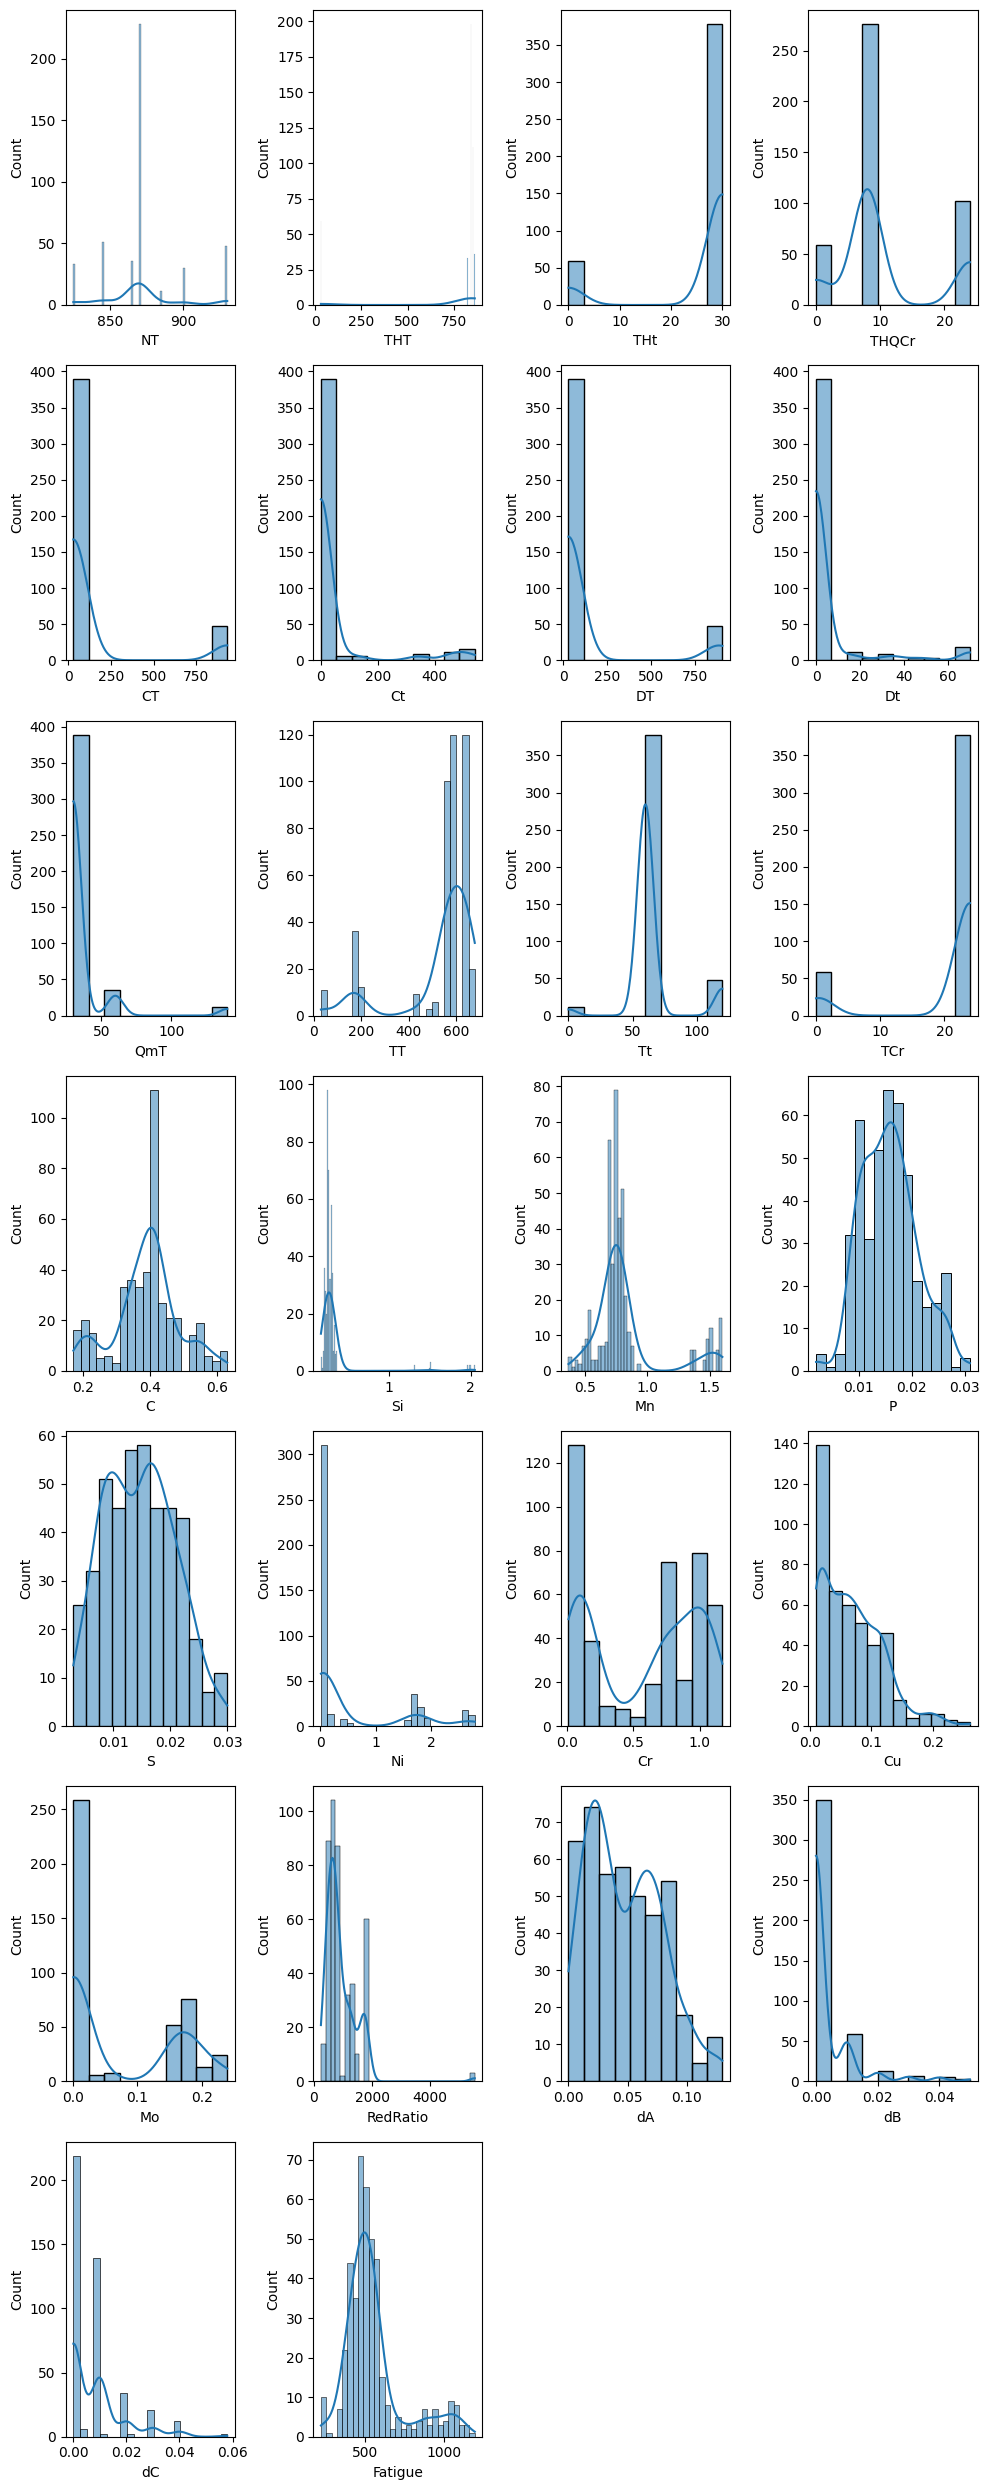

In [12]:
features = df.columns

# Plotting histograms untuk semua feature
plt.figure(figsize=(10, 25))
for i, column in enumerate(features):
    ax = plt.subplot(len(features) // 4 + 1, 4, i + 1)
    sns.histplot(data=df, x=column, kde=True)

plt.tight_layout()
plt.show()

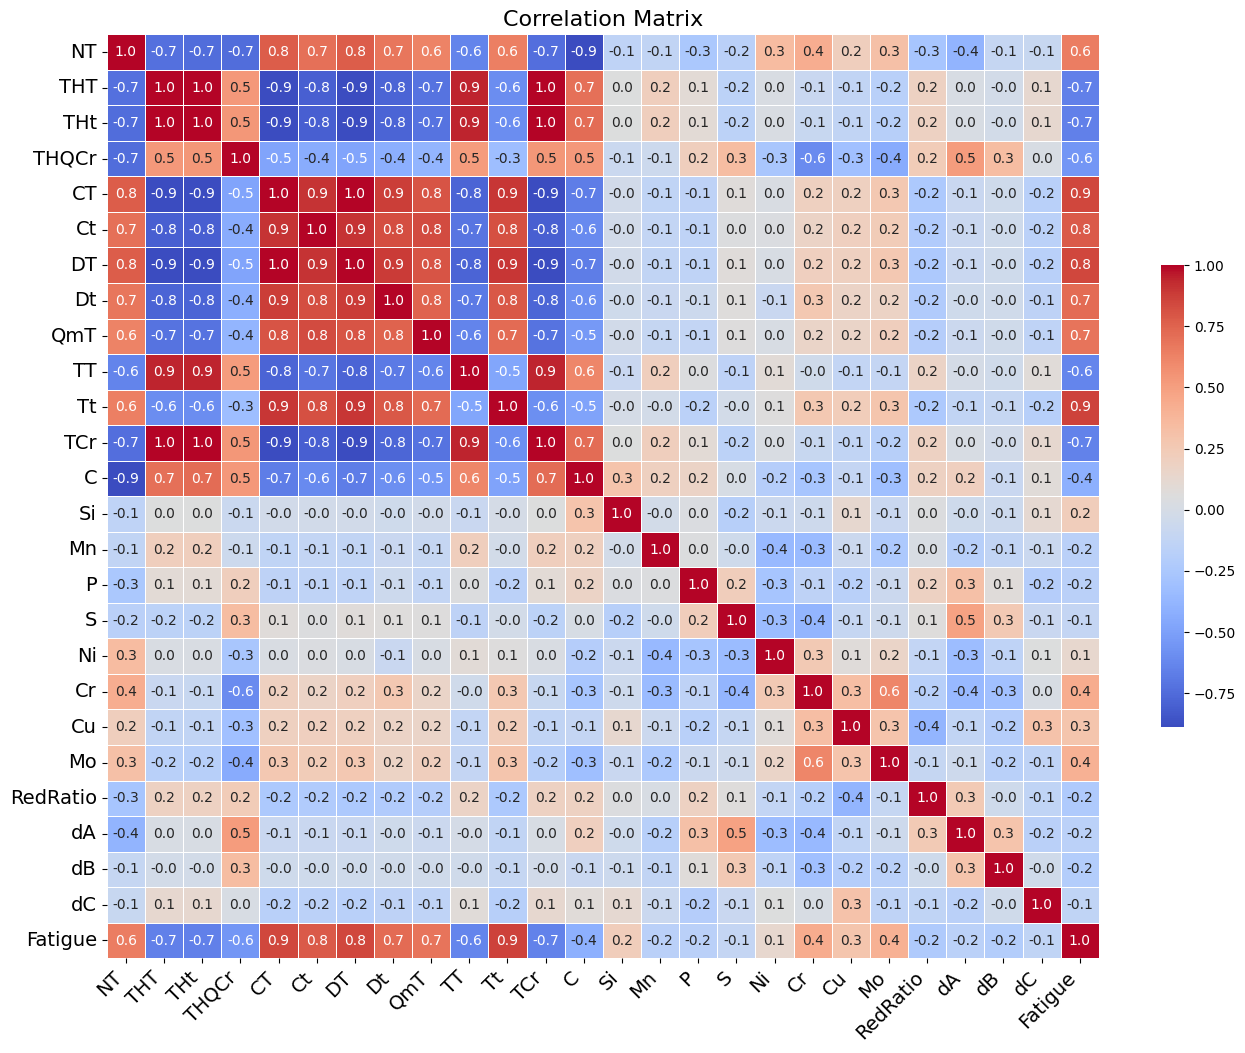

In [13]:
# Menentukan correlation matrix
corr = df.corr()

# Menampilkan heatmap dari correlation matrix
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', fmt=".1f", 
            linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Ada banyak fitur yang berkorelasi kuat pada bagian kiri atas *correlation matrix*. Hubungan di sini dapat memengaruhi kinerja dan efisiensi model.

In [14]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Melakukan Feature engineering yaitu PCA untuk mereduksi variabel yang akan digunakan, hal ini akan beguna untuk meminimalisir waktu training dari model
n_comp = len(df.iloc[1, 1:-1].values)
pca = PCA(n_components=n_comp)
X_r = pca.fit(X).transform(X)
loadings=pca.components_.T * np.sqrt(pca.explained_variance_ratio_)

5 Features from this data, already represent the entire dataset very well


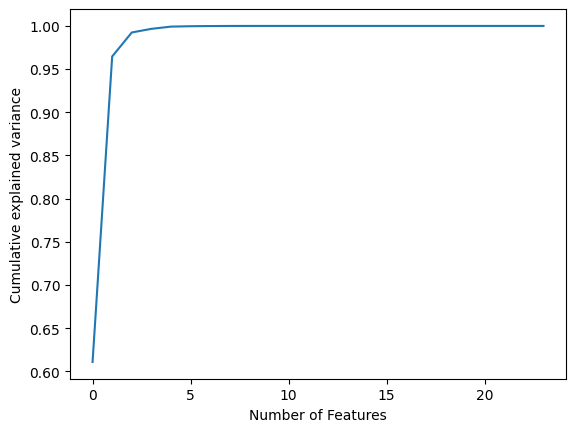

In [15]:
plt.figure()
plt.plot(range(0,n_comp),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Cumulative explained variance')
print('5 Features from this data, already represent the entire dataset very well')

In [16]:

mae = []
for i in range(5,26):
    pca = PCA(n_components=i)
    X_final = pca.fit(X).transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.25, random_state = 0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    maeval = mean_absolute_error(y_true=y_test,y_pred=y_pred)
    mae.append(maeval)

Using only 12 Features already produce an accurate result for the data


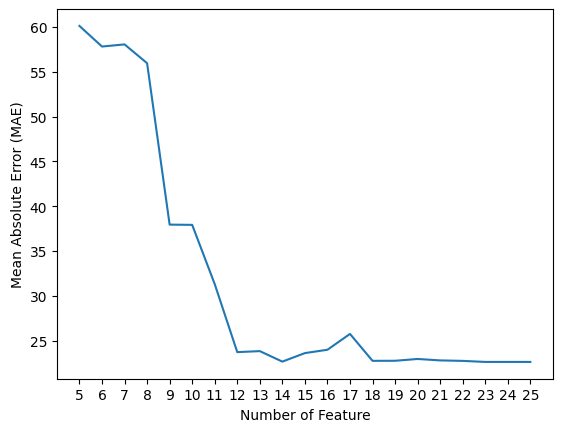

In [17]:
plt.figure()
plt.plot(range(5,26),mae)
plt.xticks(range(5, 26))
plt.xlabel('Number of Feature')
plt.ylabel('Mean Absolute Error (MAE)')
print('Using only 12 Features already produce an accurate result for the data')

# 3. Build and Train The Model

In [18]:
# Train test split
pca = PCA(n_components=12)
X_final = pca.fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=1)

In [19]:
# Membandingkan beragam model yang akan digunakan

models = [RandomForestRegressor(random_state=0), 
    LinearRegression(), 
    LogisticRegression(random_state=0), 
    Ridge(random_state=0), 
    XGBRegressor(random_state=0),
    GradientBoostingRegressor(random_state=0),
    AdaBoostRegressor(random_state=0),
    DecisionTreeRegressor(random_state=0),
    BaggingRegressor(random_state=0)]

model_names = ['Random Forest', 'Linear Regression', 'Logistic Regression', 
               'Ridge', 'XGBoost', 'Gradient Boosting', 'AdaBoost',
               'Decision Tree', 'Bagging']

## 4. Evaluate Model Performance

In [20]:
for model, name in zip(models, model_names):
    model = Pipeline([('scaler', RobustScaler()), ('model', model)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} \n  R-Squared: {r2:.5f} \n  MAE: {mae:.5f} \n  RMSE: {rmse:.5f}')

Random Forest 
  R-Squared: 0.96656 
  MAE: 23.74534 
  RMSE: 32.24803
Linear Regression 
  R-Squared: 0.95284 
  MAE: 28.16747 
  RMSE: 38.29224


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 
  R-Squared: 0.91114 
  MAE: 37.82955 
  RMSE: 52.56327
Ridge 
  R-Squared: 0.95287 
  MAE: 28.20738 
  RMSE: 38.28279
XGBoost 
  R-Squared: 0.95670 
  MAE: 25.81359 
  RMSE: 36.69451
Gradient Boosting 
  R-Squared: 0.96535 
  MAE: 23.95959 
  RMSE: 32.82603
AdaBoost 
  R-Squared: 0.94070 
  MAE: 34.13909 
  RMSE: 42.94051
Decision Tree 
  R-Squared: 0.95798 
  MAE: 27.46591 
  RMSE: 36.14475
Bagging 
  R-Squared: 0.96174 
  MAE: 24.68977 
  RMSE: 34.49089


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


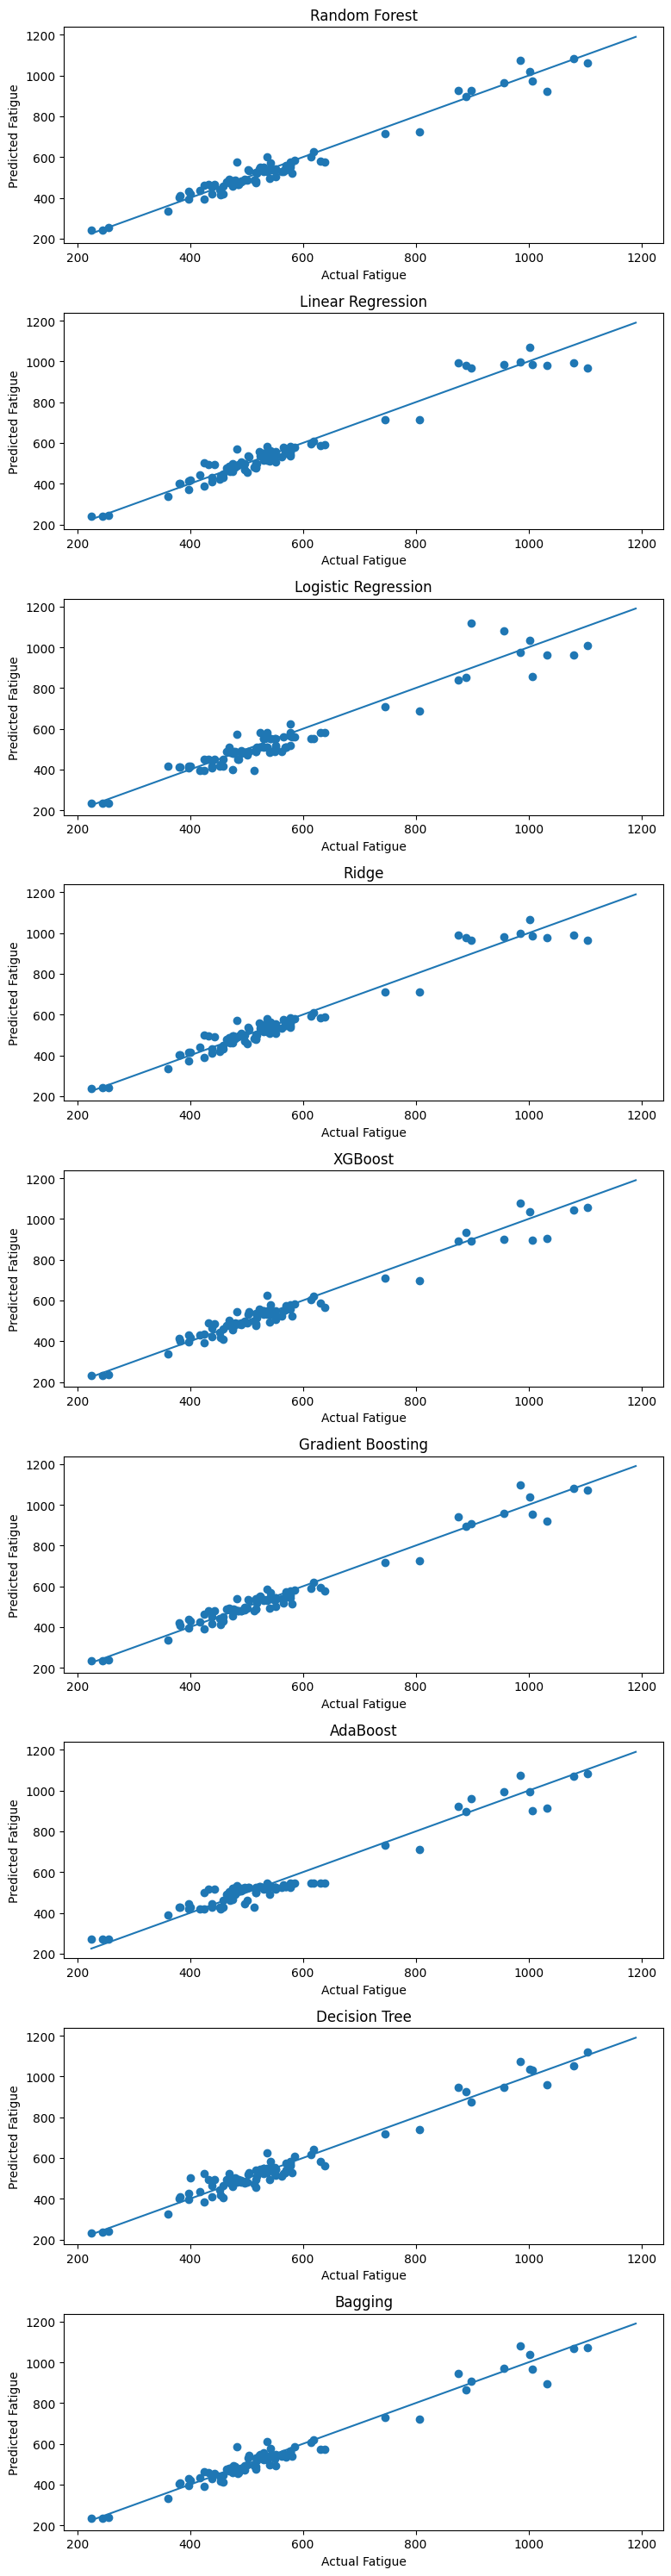

In [25]:
# visualisasi
plt.figure(figsize=(15, 30))

for i, (model, name) in enumerate(zip(models, model_names)):
    model = Pipeline([('scaler', RobustScaler()), ('model', model)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    ax = plt.subplot(len(model_names), 2, (2*i)+1)
    ax.scatter(y_test, y_pred)
    ax.plot([y.min(), y.max()], [y.min(), y.max()])
    ax.set_title(name)
    ax.set_xlabel('Actual Fatigue')
    ax.set_ylabel('Predicted Fatigue')
    
plt.tight_layout()
plt.show()

In [26]:
y = np.array(y)
rata2 = np.mean(y)
MAEterkecil = 23.74534
relativeerror = MAEterkecil/rata2
relativeerror_percentage = relativeerror * 100
print(f"error yang didapat dari model ini adalah {relativeerror_percentage:.2f}%")

error yang didapat dari model ini adalah 4.29%
